In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
#从本地导入数据
data = pd.read_csv('pima-indians-diabetes/diabetes.csv')
print('dataset shape{}'.format(data.shape))
data.head()

dataset shape(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#算出患病与不患的人数
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [4]:
#数据集拆分
X = data.iloc[:,0:8]
Y = data.iloc[:,8]
print('shape X {} ; Y {}'.format(X.shape,Y.shape))
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

shape X (768, 8) ; Y (768,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
#构造三个模型，进行结果比较
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))
#分别训练三个模型，并计算评分
results = []
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print("name:{};score:{}".format(results[i][0],results[i][1]))

name:KNN;score:0.7857142857142857
name:KNN with weights;score:0.7207792207792207
name:Radius Neighbors;score:0.6818181818181818


In [6]:
#多次随机分配，结果稍微可信点吧
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X,Y,cv=kfold)
    results.append((name,cv_results))
for i in range(len(results)):
    print("name:{};cross val score:{}".format(results[i][0],results[i][1].mean()))


name:KNN;cross val score:0.7147641831852358
name:KNN with weights;cross val score:0.6770505809979495
name:Radius Neighbors;cross val score:0.6497265892002735


In [7]:
#采取普通的K-均值算法，以上可以看出他的性能优越一些
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
train_score = knn.score(X_train,Y_train)
test_score = knn.score(X_test,Y_test)
print("train score:{};test score :{}".format(train_score,test_score))

train score:0.8322475570032574;test score :0.7857142857142857


In [9]:
#特征太多，高维数据不好操作，取出两项特征数画图，在二维里表示出来，输出前五项看看
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X,Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [11]:
#看出还是普通均值算法优越
results = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_new,Y,cv=kfold)
    results.append((name,cv_results))
for i in range(len(results)):
    print("name:{};cross_val_score :{}".format(results[i][0],results[i][1].mean()))

name:KNN;cross_val_score :0.725205058099795
name:KNN with weights;cross_val_score :0.6900375939849623
name:Radius Neighbors;cross_val_score :0.6510252904989747


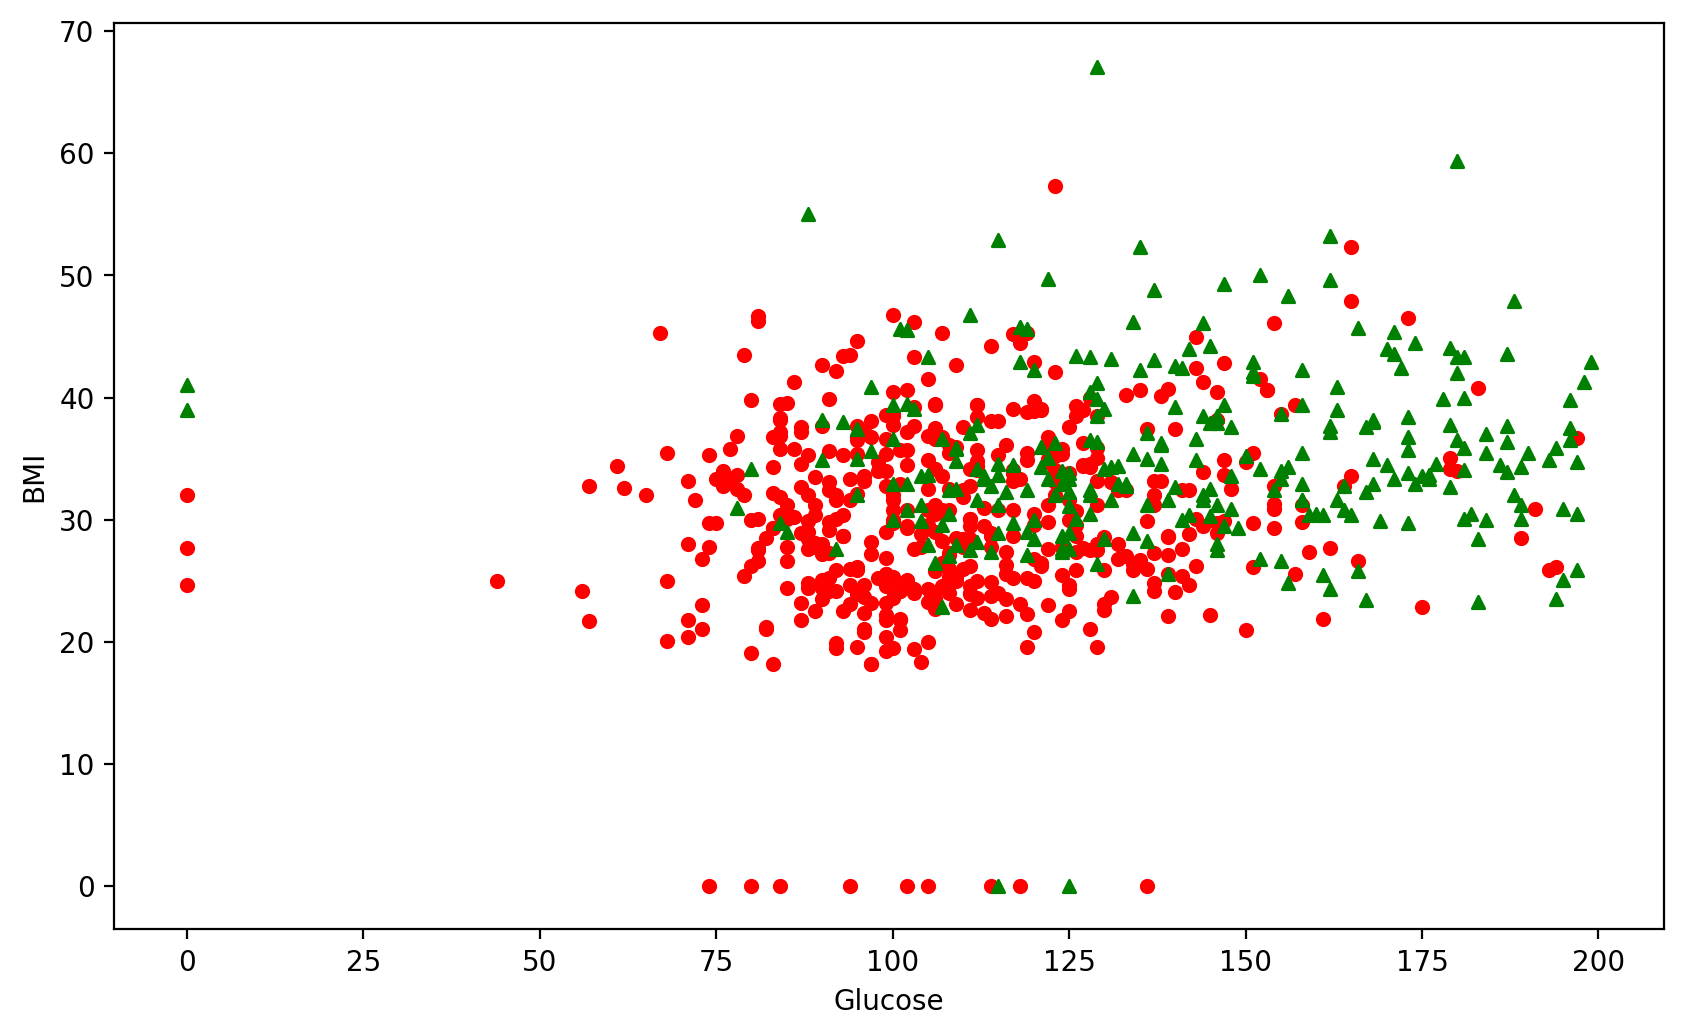

In [12]:
#画出两个特征的图
plt.figure(figsize=(10,6),dpi=200)
plt.ylabel("BMI")
plt.xlabel("Glucose")
#画出阴性Y=0的，圆圈表示
plt.scatter(X_new[Y==0][: ,0],X_new[Y==0][: ,1],c='r',s=20,marker='o')
#画出Y等于1的图，用三角形表示
plt.scatter(X_new[Y==1][:,0],X_new[Y==1][: ,1],c='g',s=20,marker='^')
#可以看出有很多重叠部分，所以如果选取在重叠部分的位置，很难判断阴性还是阳性